In [6]:
import os
import pickle
import tqdm
import functools
import multiprocessing
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt


import util_localization_psychophysics
import util_spkr_word_psychophysics
import util
import util_spkr_word_psychophysics_figures


In [ ]:
"""
Run all sound localization experiments.

`list_regex_dir_model` is a list of model conditions
(different phase locking limits / cochlear models).

Each directory included must contain the model evaluation
output files for each psychophysical stimulus dataset (all
model predictions, output probabilities, and stimulus data).
"""

list_regex_dir_model = [
    "models/sound_localization/IHC3000_delayed_integration/arch??",
    "models/sound_localization/IHC3000/arch??",
    "models/sound_localization/IHC1000/arch??",
    "models/sound_localization/IHC0320/arch??",
    "models/sound_localization/IHC0050/arch??",
    "models/sound_localization/simplified_IHC3000_delayed_integration/arch??",
    "models/sound_localization/simplified_IHC3000/arch??",
    "models/sound_localization/simplified_IHC1000/arch??",
    "models/sound_localization/simplified_IHC0320/arch??",
    "models/sound_localization/simplified_IHC0050/arch??",
]

EXPERIMENT_DATAFRAMES = util_localization_psychophysics.run_localization_experiments(
    list_regex_dir_model,
    workers=60,
    dir_human_data='data/human/sound_localization',
    tag_ckpt='',
    func_label_to_azim_elev=util_localization_psychophysics.label_to_azim_elev,
    key_pred_prob='label_loc_int:probs_out',
    key_pred='label_loc_int:labels_pred',
    key_true='label_loc_int:labels_true',
    n_loc_classes=504,
)


In [ ]:
"""
Save sound localization experiment data to files.

A dictionary of all experiment results is saved to
a single pickle file. Individual experiment results
are also saved to separate CSV files.
"""

fn_data = 'data/model/sound_localization.pkl'
with open(fn_data, 'wb') as f:
    pickle.dump(EXPERIMENT_DATAFRAMES, f)
print(f"Wrote: {fn_data}")

for tag_expt in EXPERIMENT_DATAFRAMES.keys():
    fn_data_expt = fn_data.replace('.pkl', f'/{tag_expt}.csv')
    EXPERIMENT_DATAFRAMES[tag_expt].to_csv(fn_data_expt, index=False)
    print(f"Wrote: {fn_data_expt}")


In [ ]:
"""
Load all sound localization experiment data.
"""

fn_data = 'data/model/sound_localization.pkl'
with open(fn_data, 'rb') as f:
    EXPERIMENT_DATAFRAMES = pickle.load(f)
print(f"Loaded: {fn_data}")
for tag_expt in EXPERIMENT_DATAFRAMES.keys():
    print(f"|__ {tag_expt}")


In [ ]:
"""
Calculate human-model comparison metrics for
all sound localization experiments and save
output to a file.
"""

def rmse(x, y):
    return np.linalg.norm(x - y) / np.sqrt(x.shape[0])

dict_metric_function = {
    'pearsonr': scipy.stats.pearsonr,
    'rmse': rmse,
}

df_results = []
for tag_expt in tqdm.tqdm(EXPERIMENT_DATAFRAMES.keys()):
    df = EXPERIMENT_DATAFRAMES[tag_expt]
    df_results_tmp = util_localization_psychophysics.compare_localization_experiment(
        df,
        tag_expt=tag_expt,
        dict_metric_function=dict_metric_function,
        bootstrap_repeats=1000,
        workers=60,
    )
    if df_results_tmp is not None:
        df_results.append(df_results_tmp)
df_results = pd.concat(df_results)

fn_metrics = 'data/model/sound_localization_human_model_comparison_metrics.pkl'
df_results.to_pickle(fn_metrics)
print(f"Wrote: {fn_metrics}")


In [ ]:
"""
Run all word/voice recognition experiments.

`list_regex_dir_model` is a list of model conditions
(different phase locking limits / cochlear models).

Each directory included must contain the model evaluation
output files for each psychophysical stimulus dataset (all
model predictions and stimulus metadata).
"""

list_regex_dir_model = [
    "models/spkr_recognition/IHC3000/arch0_00??",
    "models/spkr_recognition/IHC1000/arch0_00??",
    "models/spkr_recognition/IHC0320/arch0_00??",
    "models/spkr_recognition/IHC0050/arch0_00??",
    "models/word_recognition/IHC3000/arch0_00??",
    "models/word_recognition/IHC1000/arch0_00??",
    "models/word_recognition/IHC0320/arch0_00??",
    "models/word_recognition/IHC0050/arch0_00??",
    "models/spkr_word_recognition/IHC3000/arch0_00??",
    "models/spkr_word_recognition/IHC1000/arch0_00??",
    "models/spkr_word_recognition/IHC0320/arch0_00??",
    "models/spkr_word_recognition/IHC0050/arch0_00??",
    "models/spkr_word_recognition/simplified_IHC3000/arch0_00??",
    "models/spkr_word_recognition/simplified_IHC1000/arch0_00??",
    "models/spkr_word_recognition/simplified_IHC0320/arch0_00??",
    "models/spkr_word_recognition/simplified_IHC0050/arch0_00??",
]

dict_basename_eval = {
    'pitch_altered': 'EVAL_pitch_altered_v00.json',
    'kell_like': 'EVAL_word_recognition_human_experiment_v00_foreground60dbspl.json',
    'speech_in_synthetic_textures': 'EVAL_word_recognition_speech_in_synthetic_textures.json',
    'hopkins_moore_2009': 'EVAL_hopkins_moore_2009.json',
    'kell_like_inharmonic': 'EVAL_word_recognition_human_experiment_v00_inharmonic_foreground60dbspl.json',
}

EXPERIMENT_DATAFRAMES = util_spkr_word_psychophysics.run_spkr_word_experiments(
    list_regex_dir_model,
    dict_basename_eval=dict_basename_eval,
)


In [ ]:
"""
Save word/voice recognition experiment data to files.

A dictionary of all experiment results is saved to
a single pickle file. Individual experiment results
are also saved to separate CSV files.
"""

fn_data = 'data/model/spkr_word_recognition.pkl'
with open(fn_data, 'wb') as f:
    pickle.dump(EXPERIMENT_DATAFRAMES, f)
print(f"Wrote: {fn_data}")

for tag_expt in EXPERIMENT_DATAFRAMES.keys():
    fn_data_expt = fn_data.replace('.pkl', f'/{tag_expt}.csv')
    EXPERIMENT_DATAFRAMES[tag_expt].to_csv(fn_data_expt, index=False)
    print(f"Wrote: {fn_data_expt}")


In [ ]:
"""
Load all word/voice recognition experiment data.
"""

fn_data = 'data/model/spkr_word_recognition.pkl'
with open(fn_data, 'rb') as f:
    EXPERIMENT_DATAFRAMES = pickle.load(f)
print(f"Loaded: {fn_data}")
for tag_expt in EXPERIMENT_DATAFRAMES.keys():
    print(f"|__ {tag_expt}")


In [ ]:
"""
Calculate human-model comparison metrics for
all word/voice recognition experiments and save
output to a file.
"""

def rmse(x, y):
    return np.linalg.norm(x - y) / np.sqrt(x.shape[0])

dict_metric_function = {
    'pearsonr': scipy.stats.pearsonr,
    'rmse': rmse,
}

experiment_to_compfunc_map = {
    'kell_like_word': functools.partial(
        util_spkr_word_psychophysics.compare_word_recognition_kell_like,
        restrict_conditions=[0, 1, 2, 3]),
    'speech_in_synthetic_textures': functools.partial(
        util_spkr_word_psychophysics.compare_word_recognition_speech_in_synthetic_textures),
    'pitch_altered_spkr_word': functools.partial(
        util_spkr_word_psychophysics.compare_recognition_pitch_altered, key_task=['spkr', 'word']),
    'pitch_altered_word': functools.partial(
        util_spkr_word_psychophysics.compare_recognition_pitch_altered, key_task='word'),
    'pitch_altered_spkr': functools.partial(
        util_spkr_word_psychophysics.compare_recognition_pitch_altered, key_task='spkr'),
    'hopkins_moore_2009_word': functools.partial(
        util_spkr_word_psychophysics.compare_word_recognition_hopkins_moore_2009),
}

def func_to_parallelize(tag_expt):
    compfunc = experiment_to_compfunc_map[tag_expt]
    tag_expt_for_dataframe = tag_expt
    for suffix in ['_spkr', '_word', '_dip_listening']:
        tag_expt_for_dataframe = tag_expt_for_dataframe.replace(suffix, '')
    df = EXPERIMENT_DATAFRAMES[tag_expt_for_dataframe]
    df_results = None
    for metric_key, metric_function in dict_metric_function.items():
        df_results_tmp = compfunc(
            df,
            bootstrap_repeats=1000,
            metric_function=metric_function)
        df_results_tmp = df_results_tmp.rename(columns={
            'metric': metric_key,
            'bootstrap_list_metric': f'bootstrap_list_{metric_key}',
        })
        df_results_tmp['tag_expt'] = tag_expt
        if df_results is None:
            df_results = df_results_tmp
        else:
            df_results = df_results.merge(df_results_tmp, on=['tag_expt', 'tag_model'])
    return df_results


with multiprocessing.Pool(60) as pool:
    list_df_results = pool.map(func_to_parallelize, list(experiment_to_compfunc_map.keys()))
df_results = pd.concat(list_df_results)

fn_metrics = 'data/model/spkr_word_recognition_human_model_comparison_metrics.pkl'
df_results.to_pickle(fn_metrics)
print(f"Wrote: {fn_metrics}")


Loaded: data/model/spkr_word_recognition.pkl
Loaded: data/model/spkr_word_recognition_human_model_comparison_metrics.pkl


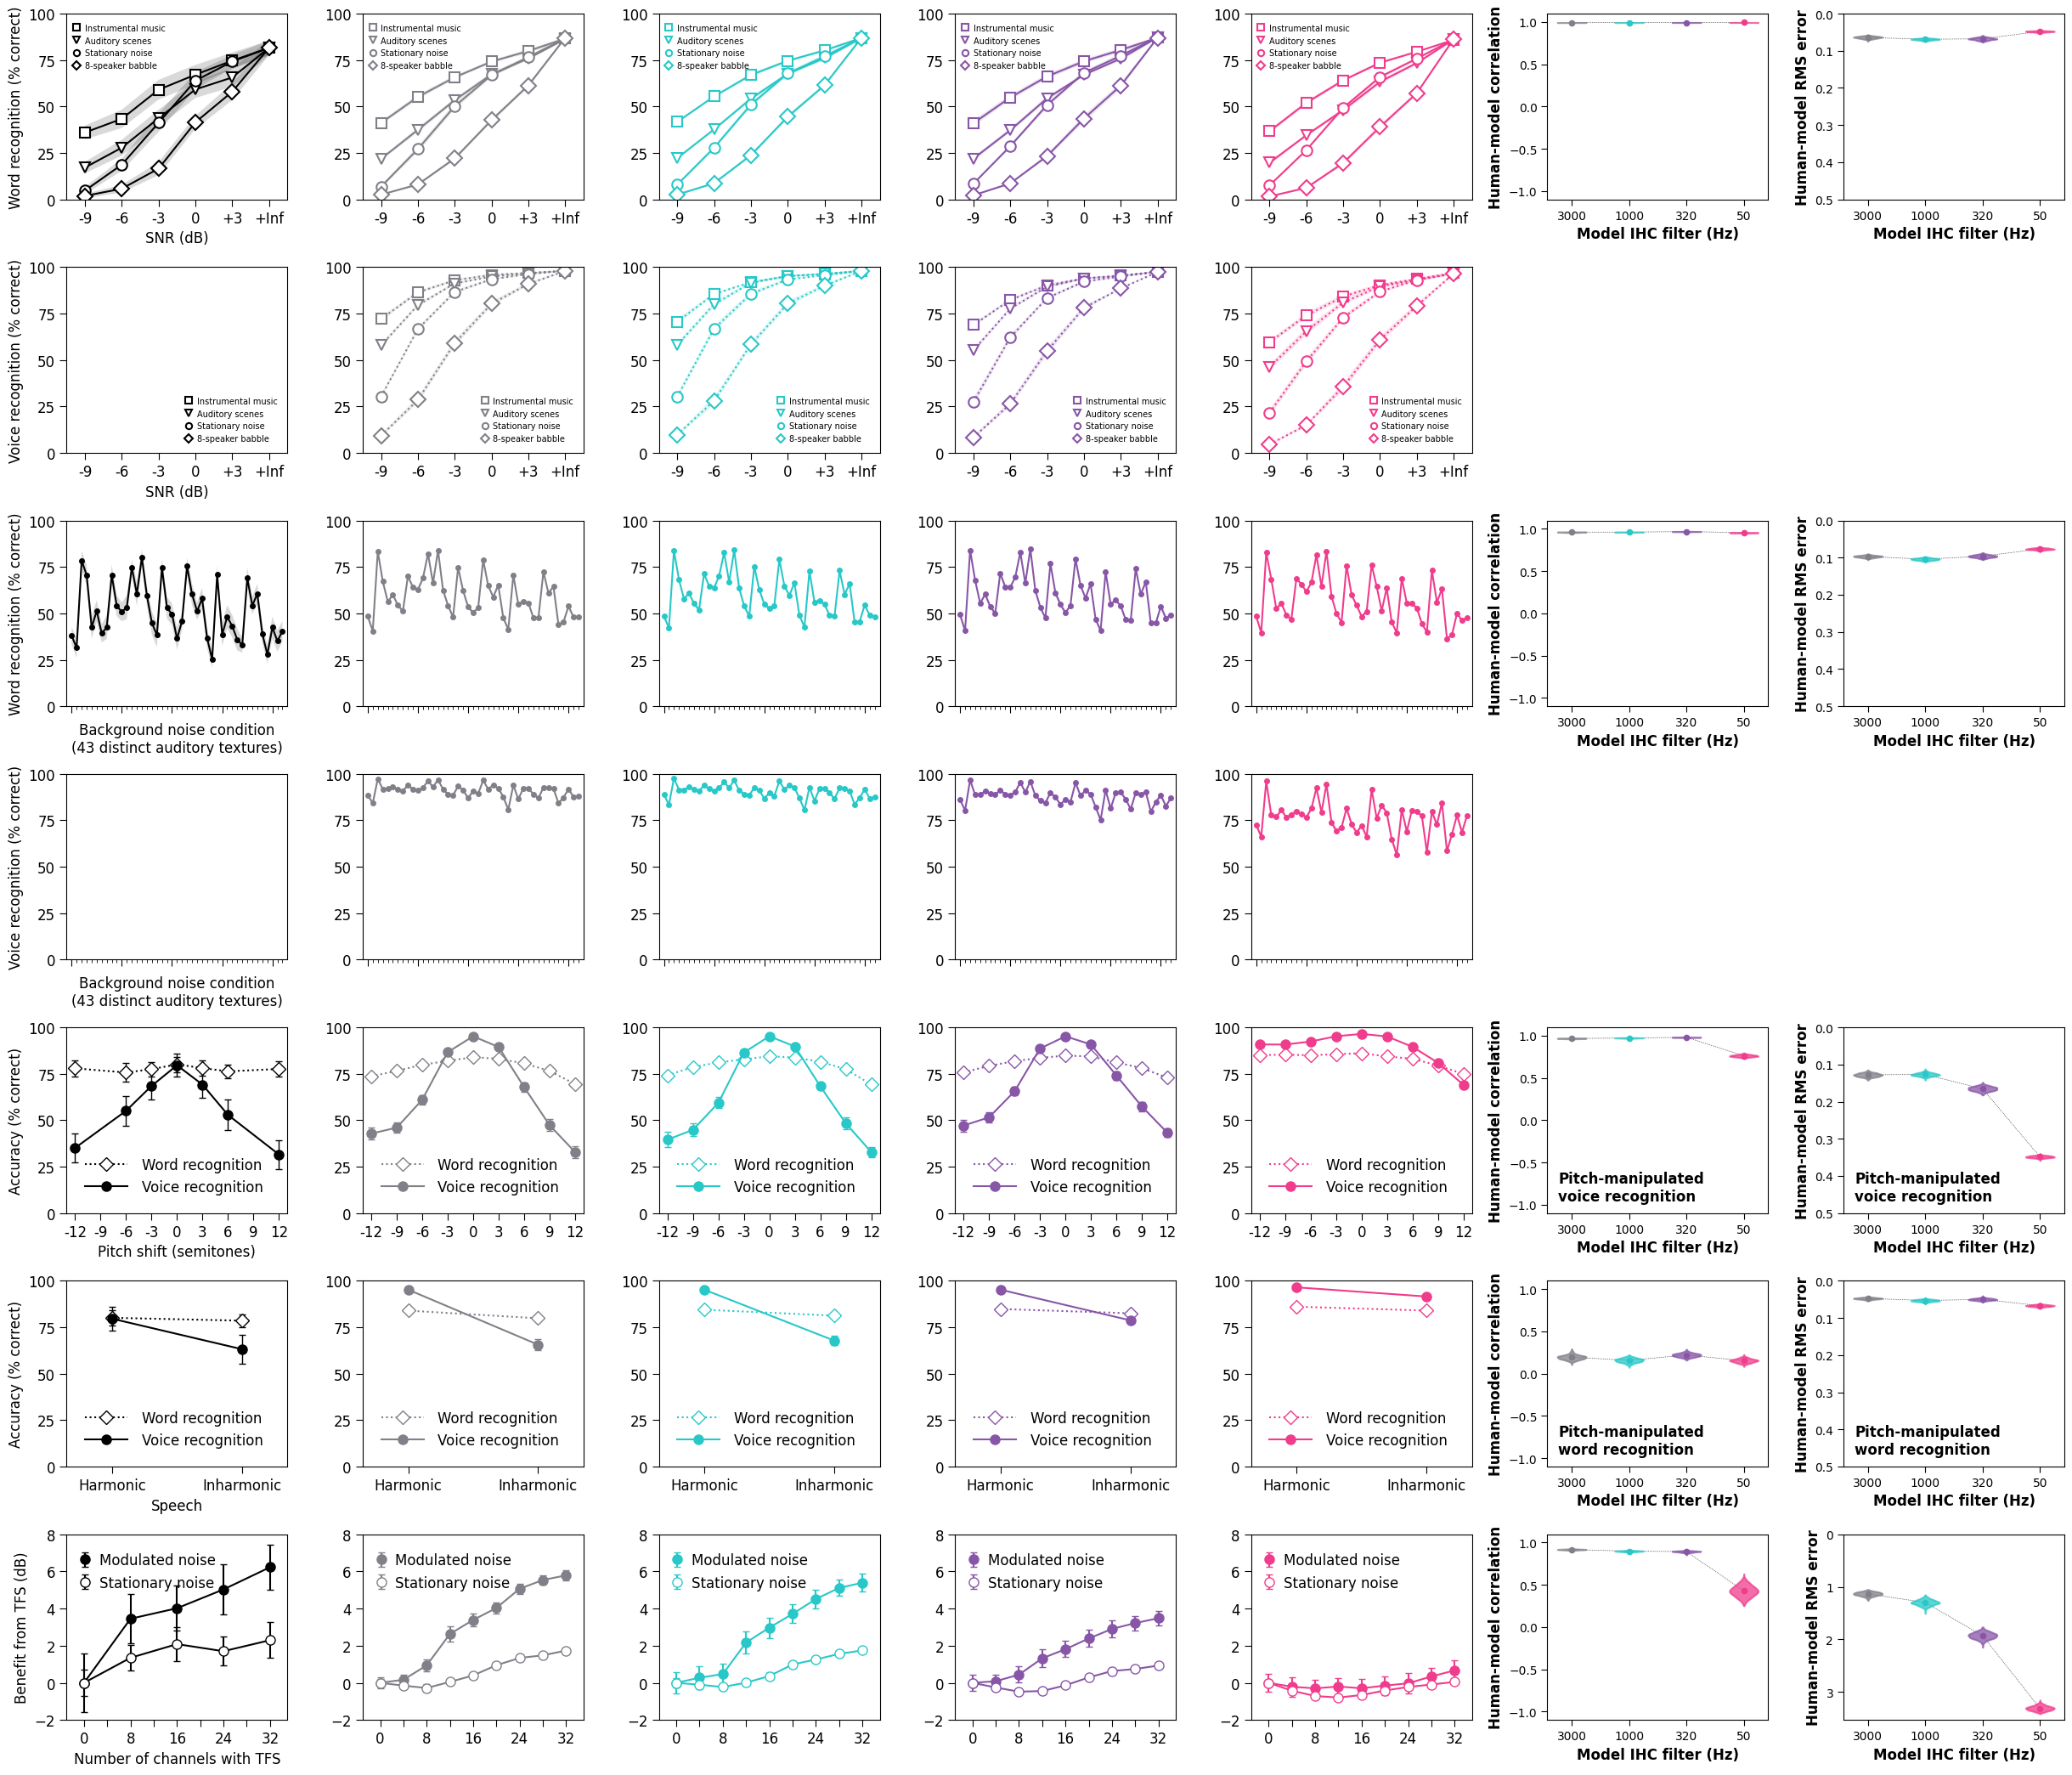

In [12]:
"""
Visualize all word/voice recognition experiment results in a large grid
(including human data, model data, and human-model comparison metrics).
"""

fn_data = 'data/model/spkr_word_recognition.pkl'
fn_metrics = 'data/model/spkr_word_recognition_human_model_comparison_metrics.pkl'

list_tag_model = [
    "human",
    "models/spkr_word_recognition/IHC3000/arch0_00??",
    "models/spkr_word_recognition/IHC1000/arch0_00??",
    "models/spkr_word_recognition/IHC0320/arch0_00??",
    "models/spkr_word_recognition/IHC0050/arch0_00??",
    # "models/spkr_word_recognition/simplified_IHC3000/arch0_00??",
    # "models/spkr_word_recognition/simplified_IHC1000/arch0_00??",
    # "models/spkr_word_recognition/simplified_IHC0320/arch0_00??",
    # "models/spkr_word_recognition/simplified_IHC0050/arch0_00??",
]
SINGLE_TASK_MODELS = 0 # Set to 1 to automatically replace joint word/voice recognition models with single-task variants

with open(fn_data, 'rb') as f:
    EXPERIMENT_DATAFRAMES = pickle.load(f)
print(f"Loaded: {fn_data}")
df_comparison = pd.read_pickle(fn_metrics)
print(f"Loaded: {fn_metrics}")

map_tag_expt_to_plot_func = {
    'kell_like_word': functools.partial(
        util_spkr_word_psychophysics_figures.make_plot_kell_like_recognition,
        key_task='word',
        fontsize_legend=7,
        restrict_background_condition=[2, 0, 3, 1]),
    'kell_like_spkr': functools.partial(
        util_spkr_word_psychophysics_figures.make_plot_kell_like_recognition,
        key_task='spkr',
        fontsize_legend=7,
        restrict_background_condition=[2, 0, 3, 1],
        kwargs_plot_update={'ls': ':'}),
    'speech_in_synthetic_textures_word': functools.partial(
        util_spkr_word_psychophysics_figures.make_plot_speech_in_synthetic_textures,
        key_task='word'),
    'speech_in_synthetic_textures_spkr': functools.partial(
        util_spkr_word_psychophysics_figures.make_plot_speech_in_synthetic_textures,
        key_task='spkr'),
    'pitch_shifted': functools.partial(
        util_spkr_word_psychophysics_figures.make_plot_pitch_shifted_recognition,
        key_task=['word', 'spkr']),
    'pitch_condition': functools.partial(
        util_spkr_word_psychophysics_figures.make_plot_pitch_condition_recognition,
        key_task=['word', 'spkr']),
    'hopkins_moore_2009_word': util_spkr_word_psychophysics_figures.make_plot_hopkins_moore_2009_tfs_benefit,
}

list_key_metric = [
    'pearsonr',
    'rmse',
]
nrows = len(map_tag_expt_to_plot_func.keys())
ncols = len(list_tag_model) + len(list_key_metric)
figsize = (3.5 * ncols, 3 * nrows)
fig, ax_arr = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
ax_arr = ax_arr.reshape([nrows, ncols])
for r, tag_expt in enumerate(map_tag_expt_to_plot_func.keys()):
    tag_expt_for_dataframe = tag_expt
    if 'pitch' in tag_expt:
        tag_expt_for_dataframe = 'pitch_altered'
    for suffix in ['_spkr', '_word', '_dip_listening']:
        tag_expt_for_dataframe = tag_expt_for_dataframe.replace(suffix, '')
    for c, tag_model in enumerate(list_tag_model):
        color, _ = util.get_color_and_label_from_model_tag(tag_model)
        ax = ax_arr[r, c]
        df = EXPERIMENT_DATAFRAMES[tag_expt_for_dataframe]
        if (not tag_model == 'human') and (SINGLE_TASK_MODELS):
            if 'spkr' in tag_expt:
                df = df[df.tag_model == tag_model.replace('spkr_word_recognition', 'spkr_recognition')]
                map_tag_expt_to_plot_func[tag_expt](ax, df, color=color, key_task='spkr')
            if 'word' in tag_expt:
                df = df[df.tag_model == tag_model.replace('spkr_word_recognition', 'word_recognition')]
                map_tag_expt_to_plot_func[tag_expt](ax, df, color=color, key_task='word')
            if (not 'spkr' in tag_expt) and (not 'word' in tag_expt):
                df_merged = df[df.tag_model == tag_model.replace('spkr_word_recognition', 'spkr_recognition')].copy()
                df_word = df[df.tag_model == tag_model.replace('spkr_word_recognition', 'word_recognition')].copy()
                for column in df_word.columns:
                    if 'word' in column:
                        df_merged.loc[:, column] = df_word[column].values
                map_tag_expt_to_plot_func[tag_expt](ax, df_merged, color=color)
        else:
            df = df[df.tag_model == tag_model]
            map_tag_expt_to_plot_func[tag_expt](ax, df, color=color)
        if c > 0:
            ax.xaxis.label.set_color('w')
            ax.yaxis.label.set_color('w')

for r, tag_expt in enumerate(map_tag_expt_to_plot_func.keys()):
    for itr_metric, key_metric in enumerate(list_key_metric):
        c = len(list_tag_model) + itr_metric
        ax = ax_arr[r, c]
        list_tag_model_for_make_plot_comparison_metrics = list_tag_model[1:]
        tag_expt_for_dataframe = tag_expt
        if 'pitch_shifted' in tag_expt:
            tag_expt_for_dataframe = 'pitch_altered_spkr'
        elif 'pitch_condition' in tag_expt:
            tag_expt_for_dataframe = 'pitch_altered_word'
        elif 'speech_in_synthetic_textures_word' in tag_expt:
            tag_expt_for_dataframe = 'speech_in_synthetic_textures'
        if SINGLE_TASK_MODELS:
            list_tag_model_for_make_plot_comparison_metrics = [
                _.replace(
                    'spkr_word_recognition',
                    'spkr_recognition' if 'spkr' in tag_expt_for_dataframe else 'word_recognition',
                )
                for _ in list_tag_model_for_make_plot_comparison_metrics
            ]
        kwargs_format_axes_update = {
            'fontsize_ticks': 10,
            'fontweight_labels': 'bold',
            'str_ylabel': r'Human-model correlation' if key_metric == 'pearsonr' else 'Human-model RMS error',
            'str_xlabel': 'Model IHC filter (Hz)',
        }
        if key_metric == 'pearsonr':
            kwargs_format_axes_update['ylimits'] = [-1.1, 1.1]
            kwargs_format_axes_update['yticks'] = [-1, -0.5, 0, 0.5, 1]
        if key_metric == 'rmse':
            kwargs_format_axes_update['ylimits'] = [0, None]
        if len(df_comparison[df_comparison.tag_expt == tag_expt_for_dataframe]) > 0:
            ax = util.make_plot_comparison_metrics(
                ax,
                df=df_comparison[df_comparison.tag_expt == tag_expt_for_dataframe],
                key_metric=key_metric,
                list_tag_model=list_tag_model_for_make_plot_comparison_metrics,
                kwargs_format_axes_update=kwargs_format_axes_update)
            if not key_metric == 'pearsonr':
                ax.invert_yaxis()
            kwargs_text = {'ha': 'left', 'va': 'bottom', 'transform': ax.transAxes, 'fontsize':12, 'fontweight': 'bold'}
            if tag_expt_for_dataframe == 'pitch_altered_word':
                ax.text(0.05, 0.05, 'Pitch-manipulated\nword recognition', **kwargs_text)
            if tag_expt_for_dataframe == 'pitch_altered_spkr':
                ax.text(0.05, 0.05, 'Pitch-manipulated\nvoice recognition', **kwargs_text)
            ylim = list(ax.get_ylim())
            if (key_metric == 'rmse') and (ylim[0] < 0.5):
                ylim[0] = 0.5
                ax.set_ylim(ylim)
        else:
            ax.set_axis_off()
plt.tight_layout()
plt.show()
